# CZ2 Simualtion with a montane shrub 081122


In [1]:
import os

import xarray as xr
import functools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

%matplotlib inline

In [ ]:
# path = '/glade/u/home/adamhb/misc/CZ2-dispersal-test'
# files = os.listdir(path)
# full_paths = [os.path.join(path,f) for f in files]
# sorted(full_paths)

In [2]:
n_pfts = 3
pft_names = ["pine","cedar","fir"]#,"shrub","oak"]
pft_colors = ['gold','darkorange','darkolivegreen','brown','springgreen']
path = '/glade/scratch/adamhb/archive/'
sim_root = path
case = 'CZ2_sup_070723_ca_allom_test_CLM-17e2acb6a_FATES-ad67d1fe'
case_2 = 'bci_main_branch'
years_1 = list(range(1900, 2090))
years_2 = list(range(2050, 2054)) 
two_case_timeseries = False
output_path = '/glade/u/home/adamhb/misc'


months = list(range(1, 13, 1))     #python will go up to, but not including month 13)
# build a list of file names based on the year and month
file_names = [f"{case}.clm2.h0.{str(year)}-{str(month).rjust(2, '0')}.nc"
              for year in years_1 for month in months]
# create their full path
full_paths = [os.path.join(path, case, 'lnd/hist', fname) for fname in file_names]


if two_case_timeseries == True:
    file_names_1 = [f"{case}.clm2.h0.{str(year)}-{str(month).rjust(2, '0')}.nc"
                    for year in years_1 for month in months]
    
    full_paths_1 = [os.path.join(path, case, 'lnd/hist', fname) for fname in file_names_1]
    
    file_names_2 = [f"{case_2}.clm2.h0.{str(year)}-{str(month).rjust(2, '0')}.nc"
                  for year in years_2 for month in months]
    full_paths_2 = [os.path.join(path, case_2, 'lnd/hist', fname) for fname in file_names_2]
    
    
    file_names = file_names_1 + file_names_2
    full_paths = full_paths_1 + full_paths_2

# print the last file in our list
#print(file_names[0])
#print(full_paths[-1])
print(full_paths[0])
print(full_paths[-1])

/glade/scratch/adamhb/archive/CZ2_sup_070723_ca_allom_test_CLM-17e2acb6a_FATES-ad67d1fe/lnd/hist/CZ2_sup_070723_ca_allom_test_CLM-17e2acb6a_FATES-ad67d1fe.clm2.h0.1900-01.nc
/glade/scratch/adamhb/archive/CZ2_sup_070723_ca_allom_test_CLM-17e2acb6a_FATES-ad67d1fe/lnd/hist/CZ2_sup_070723_ca_allom_test_CLM-17e2acb6a_FATES-ad67d1fe.clm2.h0.2089-12.nc


### Choose variables to import

In [ ]:
fields = ['FATES_BASALAREA_SZPF','FATES_SEED_PROD_USTORY_SZ','FATES_VEGC_AP','FATES_CANOPYCROWNAREA_PF']

In [3]:
# define the history variables to read in
fields = [
          #have on to import these dimensions
          'FATES_SEED_PROD_USTORY_SZ',
          'FATES_VEGC_AP',
          #patches and cohorts
          'FATES_NPATCHES',
          'FATES_PATCHAREA_AP','FATES_CANOPYAREA_AP',
          'FATES_NCOHORTS','FATES_NPATCH_AP',
          #structure
          #'FATES_LAI_AP',
          #density
          'FATES_NPLANT_PF',
          'FATES_NPLANT_SZAPPF',
          'FATES_NPLANT_SZPF',
          'FATES_NPLANT_ACPF',
          'FATES_NPLANT_CANOPY_SZPF',
          'FATES_NPLANT_USTORY_SZPF',
          #basal area
          'FATES_BASALAREA_SZPF',
          #crown_area
          'FATES_CANOPYCROWNAREA_PF',
          'FATES_CANOPYCROWNAREA_APPF',
          #'FATES_CANOPYAREA_HT',
          #'FATES_CROWNAREA_CLLL',
          'FATES_CROWNAREA_PF',
          #biomass
          'FATES_VEGC_PF','FATES_VEGC_AP','FATES_VEGC_ABOVEGROUND','FATES_VEGC_ABOVEGROUND_SZPF',
          #growth
          #'FATES_DDBH_SZPF',
          #'FATES_DDBH_CANOPY_SZAP','FATES_DDBH_USTORY_SZAP',
          #mortality
          'FATES_MORTALITY_PF',
          #'FATES_MORTALITY_CANOPY_SZAP','FATES_MORTALITY_USTORY_SZAP',
          'FATES_MORTALITY_BACKGROUND_SZPF','FATES_MORTALITY_HYDRAULIC_SZPF','FATES_MORTALITY_CSTARV_SZPF',
          #'FATES_MORTALITY_IMPACT_SZPF',
          'FATES_MORTALITY_FIRE_SZPF','FATES_MORTALITY_CROWNSCORCH_SZPF',
          #'FATES_MORTALITY_CANOPY_SZ','FATES_MORTALITY_USTORY_SZ',
          'FATES_MORTALITY_SENESCENCE_SZPF',
          #seed production and recruitment
          #'FATES_SEED_PROD_USTORY_SZ','FATES_SEED_PROD_CANOPY_SZ',
          #'FATES_SEEDS_IN',
          'FATES_SEED_BANK',
          'FATES_SEEDBANK_PF',
          'FATES_SEED_ALLOC_SZPF',
          'FATES_RECRUITMENT_PF',
          #GPP and NPP
          #'FATES_GPP','FATES_GPP_SZPF',
          'FATES_NPP_PF','FATES_NPP_SZPF',
          'FATES_AUTORESP_SZPF','FATES_MAINTAR_SZPF',
          #physical environment
          #Light
          'FATES_LAISUN_Z_CLLL','FATES_LAISHA_Z_CLLL',
          'FATES_LAISUN_Z_CLLLPF','FATES_LAISHA_Z_CLLLPF',
          'FATES_PARSUN_Z_CLLLPF','FATES_PARSHA_Z_CLLLPF',
          'FATES_PARPROF_DIR_CLLL','FATES_PARPROF_DIF_CLLL',
          'FATES_PARPROF_DIF_CLLLPF','FATES_PARPROF_DIR_CLLLPF',
          #Litter
          'FATES_CWD_ABOVEGROUND_DC',
          'FATES_FUEL_AMOUNT',
          #CLM
          'QVEGT','QVEGE','QSOIL','TLAI','TBOT','RAIN','QBOT','Q2M',
          #'BTRAN',
          #H20
          'SMP',
          #allocation
          #'FATES_STOREC_CANOPY_SZPF','FATES_STOREC_USTORY_SZPF',
          #fire
          'FATES_BURNFRAC','FATES_IGNITIONS','FATES_FIRE_INTENSITY_BURNFRAC',
          'FATES_FUEL_BULKD','FATES_FUEL_SAV',
           'FATES_DISTURBANCE_RATE_FIRE',
          # 'FATES_FUEL_AMOUNT_AP',
          # 'FATES_FIRE_INTENSITY_BURNFRAC_AP',
          # 'FATES_BURNFRAC_AP',
           'FATES_FUEL_AMOUNT_APFC',
           'FATES_FUEL_AMOUNT',
           'FATES_FDI',
           'FATES_FIRE_INTENSITY',
           'FATES_FUELCONSUMED',
           'FATES_NESTEROV_INDEX',
           'FATES_MORTALITY_CROWNSCORCH_SZPF',
          # 'FATES_SCORCH_HEIGHT_APPF','FATES_FUEL_MEF',
           'FATES_FUEL_EFF_MOIST','FATES_FUEL_MOISTURE_FC','FATES_ROS'
          # 'FATES_MORTALITY_FIRE_CFLUX_PF'
          ]

In [ ]:
# define the history variables to read in
fields = [
          # #have on to import these dimensions
           'FATES_SEED_PROD_USTORY_SZ',
           'FATES_VEGC_AP',
          # #patches and cohorts
           'FATES_NPATCHES',
          # 'FATES_PATCHAREA_AP','FATES_CANOPYAREA_AP',
           'FATES_NCOHORTS','FATES_NPATCH_AP',
          # #structure
          # #'FATES_LAI_AP',
          # #density
           'FATES_NPLANT_PF',
           'FATES_NPLANT_SZAPPF',
           'FATES_NPLANT_SZPF',
           'FATES_NPLANT_ACPF',
          # 'FATES_NPLANT_CANOPY_SZPF',
          # 'FATES_NPLANT_USTORY_SZPF',
          # #basal area
          # 'FATES_BASALAREA_SZPF',
          # #crown_area
          # 'FATES_CANOPYCROWNAREA_PF',
          # #'FATES_CANOPYAREA_HT',
          # #'FATES_CROWNAREA_CLLL',
          # 'FATES_CROWNAREA_PF',
          # #biomass
          # 'FATES_NPP_PF','FATES_RECRUITMENT_PF','FATES_NPLANT_PF','FATES_PATCHAREA_AP',
          # 'FATES_MORTALITY_PF','FATES_NPATCHES','FATES_NCOHORTS','FATES_VEGC_PF',
          # 'FATES_MORTALITY_CANOPY_SZAP','FATES_MORTALITY_USTORY_SZAP','FATES_SEED_BANK_TRS',
          # 'FATES_SEEDLING_POOL_TRS','FATES_PARPROF_DIR_CLLL','FATES_PARPROF_DIF_CLLL',
          # 'FATES_LAISUN_Z_CLLL','FATES_LAISHA_Z_CLLL','FATES_DDBH_CANOPY_SZAP',
          # 'FATES_DDBH_USTORY_SZAP','FATES_SEED_PROD_USTORY_SZ','FATES_SEED_PROD_CANOPY_SZ',
          # 'FATES_SEEDS_IN','FATES_SEEDS_IN_LOCAL'
          # #growth
          # #'FATES_DDBH_SZPF',
          # #'FATES_DDBH_CANOPY_SZAP','FATES_DDBH_USTORY_SZAP',
          # #mortality
          # 'FATES_MORTALITY_PF',
          # #'FATES_MORTALITY_CANOPY_SZAP','FATES_MORTALITY_USTORY_SZAP',
          # 'FATES_MORTALITY_BACKGROUND_SZPF','FATES_MORTALITY_HYDRAULIC_SZPF','FATES_MORTALITY_CSTARV_SZPF',
          # #'FATES_MORTALITY_IMPACT_SZPF',
           'FATES_MORTALITY_FIRE_SZPF','FATES_MORTALITY_CROWNSCORCH_SZPF',
          # #'FATES_MORTALITY_CANOPY_SZ','FATES_MORTALITY_USTORY_SZ',
          # 'FATES_MORTALITY_SENESCENCE_SZPF',
          # #seed production and recruitment
          # #'FATES_SEED_PROD_USTORY_SZ','FATES_SEED_PROD_CANOPY_SZ',
          # #'FATES_SEEDS_IN',
          # 'FATES_SEED_BANK','FATES_SEED_ALLOC_SZPF',
          # 'FATES_RECRUITMENT_PF',
          # #GPP and NPP
          # #'FATES_GPP','FATES_GPP_SZPF',
          # 'FATES_NPP_PF','FATES_NPP_SZPF',
          # 'FATES_AUTORESP_SZPF','FATES_MAINTAR_SZPF',
          # #physical environment
          # #Light
          # #'FATES_LAISUN_Z_CLLL','FATES_LAISHA_Z_CLLL',
          # #'FATES_LAISUN_Z_CLLLPF','FATES_LAISHA_Z_CLLLPF',
          # #'FATES_PARSUN_Z_CLLLPF','FATES_PARSHA_Z_CLLLPF',
          # #'FATES_PARPROF_DIR_CLLL','FATES_PARPROF_DIF_CLLL',
          # #'FATES_PARPROF_DIF_CLLLPF','FATES_PARPROF_DIR_CLLLPF',
          # #Litter
          # 'FATES_CWD_ABOVEGROUND_DC',
          # 'FATES_FUEL_AMOUNT',
          # #CLM
          #'QVEGT','QVEGE','QSOIL','TLAI','TBOT','RAIN','QBOT','Q2M',
          #'BTRAN', 'SNOW','SOILPSI','H2OSOI','RH2M','Rnet','Rainf','TSA',
          #H20
          #'SMP'
          # #allocation
          # #'FATES_STOREC_CANOPY_SZPF','FATES_STOREC_USTORY_SZPF',
          # #fire
          'FATES_BURNFRAC','FATES_IGNITIONS','FATES_FIRE_INTENSITY_BURNFRAC',
          'FATES_FUEL_BULKD','FATES_FUEL_SAV',
          # 'FATES_DISTURBANCE_RATE_FIRE',
          # 'FATES_FUEL_AMOUNT_AP',
          # 'FATES_FIRE_INTENSITY_BURNFRAC_AP',
           'FATES_BURNFRAC_AP',
           'FATES_FUEL_AMOUNT_APFC',
           'FATES_FUEL_AMOUNT',
          # 'FATES_FDI',
           'FATES_FIRE_INTENSITY',
          # 'FATES_FUELCONSUMED',
           'FATES_NESTEROV_INDEX',
          # 'FATES_MORTALITY_CROWNSCORCH_SZPF',
          # 'FATES_SCORCH_HEIGHT_APPF','FATES_FUEL_MEF',
          # 'FATES_FUEL_EFF_MOIST','FATES_FUEL_MOISTURE_FC','FATES_ROS'
          # 'FATES_MORTALITY_FIRE_CFLUX_PF'
          ]

In [ ]:
fields = ['FATES_NPLANT_PF','FATES_MORTALITY_PF','FATES_NPATCHES','FATES_VEGC_PF','FATES_MORTALITY_CANOPY_SZAP',
'FATES_PATCHAREA_AP','FATES_CANOPYAREA_AP','FATES_VEGC_AP','FATES_CROWNAREA_CLLL','FATES_DDBH_CANOPY_SZAP',
'FATES_DDBH_USTORY_SZAP','FATES_NPLANT_SZAPPF','FATES_NPLANT_SZPF','FATES_NPLANT_ACPF','FATES_NPLANT_CANOPY_SZPF',
'FATES_CWD_ABOVEGROUND_DC','FATES_DDBH_SZPF','FATES_BASALAREA_SZPF','FATES_RECRUITMENT_PF',
'FATES_GPP','FATES_GPP_SZPF','FATES_NPP_SZPF','FATES_NPP_PF','FATES_NCOHORTS','FATES_NPATCH_AP',
'QSOIL','TLAI','TBOT','RAIN','QBOT','Q2M','FATES_SEED_PROD_USTORY_SZ','FATES_SEED_PROD_CANOPY_SZ',
'FATES_SEEDS_IN','FATES_VEGC_ABOVEGROUND', 'FATES_VEGC_ABOVEGROUND_SZPF', 'FATES_CROWNAREA_PF',
'FATES_CANOPYCROWNAREA_PF','FATES_CANOPYAREA_HT','FATES_BURNFRAC',
'FATES_SEED_BANK','FATES_SEEDS_IN','FATES_SEED_ALLOC_SZPF','FATES_MORTALITY_SENESCENCE_SZPF',
'FATES_AUTORESP_SZPF','FATES_MAINTAR_SZPF','SMP','FATES_CROWNAREA_PF','FATES_PARPROF_DIR_CLLL',
'FATES_PARPROF_DIF_CLLL','FATES_PARPROF_DIR_CLLLPF','FATES_PARPROF_DIF_CLLLPF','FATES_FUEL_AMOUNT_AP',
'FATES_FIRE_INTENSITY_BURNFRAC_AP', 'FATES_BURNFRAC_AP', 'FATES_FUEL_AMOUNT_APFC', 'FATES_FUEL_AMOUNT',
'FATES_FDI','FATES_FIRE_INTENSITY','FATES_FUELCONSUMED','FATES_SCORCH_HEIGHT_APPF',
'FATES_FUEL_MEF','FATES_FUEL_EFF_MOIST','FATES_FUEL_MOISTURE_FC','FATES_ROS','FATES_NESTEROV_INDEX',
'FATES_FUEL_BULKD','FATES_FUEL_SAV','FATES_VEGC_APPF','FATES_NPP_APPF']


### Define constants

In [4]:
#Define constants
s_per_yr = 31536000
s_per_day = 3600 * 24
m2_per_ha = 1e4
g_per_kg = 1000
mm_per_m = 1000
months_per_yr = 12
s_per_month = 3600 * 24 * 30.4

Jan1_final_year = "{}-01-01".format(years_1[-1])
Dec31_final_year = "{}-12-31".format(years_1[-1])

<div class="alert alert-block alert-info">
These are the raw history files that CTSM writes out.  
By default, they include grid cell averaged monthly means for different state and flux variables.
<br><br>
Typically we post-process these data to generate single variable time series for an experiment. 
This means that the full time series of model output for each variable, like rain, air temperature, or latent heat flux, are each in their own file.
A post-processing tutorial will be available at a later date, but for now we'll just read in the monthly history files described above.

</div>

### Define functions

In [5]:
def pftLevelVarOverTime(n_pfts,var_name):
    """Function to plot a pft-level variable over time in facetted by pft"""
    fig, axes = plt.subplots(4,figsize=(10,10),sharey = True)
    for p in range(n_pfts):
        ds[var_name].isel(fates_levpft=p).plot(ax = axes[p], color = pft_colors[p])
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.subplots_adjust(left=1, bottom=1, right=2, top=2, wspace=1, hspace=2)
    
    
def scpf_to_scls_by_pft(scpf_var, dataset):
    """function to reshape a fates multiplexed size and pft-indexed variable to one indexed by size class and pft
    first argument should be an xarray DataArray that has the FATES SCPF dimension
    second argument should be an xarray Dataset that has the FATES SCLS dimension 
    (possibly the dataset encompassing the dataarray being transformed)
    returns an Xarray DataArray with the size and pft dimensions disentangled"""
    n_scls = len(dataset.fates_levscls)
    ds_out = (scpf_var.rolling(fates_levscpf=n_scls, center=False)
            .construct("fates_levscls")
            .isel(fates_levscpf=slice(n_scls-1, None, n_scls))
            .rename({'fates_levscpf':'fates_levpft'})
            .assign_coords({'fates_levscls':dataset.fates_levscls})
            .assign_coords({'fates_levpft':dataset.fates_levpft}))
    ds_out.attrs['long_name'] = scpf_var.attrs['long_name']
    ds_out.attrs['units'] = scpf_var.attrs['units']
    return(ds_out)

def agefuel_to_age_by_fuel(agefuel_var, dataset): 
    n_age = len(dataset.fates_levage)
    ds_out = (agefuel_var.rolling(fates_levagefuel = n_age, center=False).construct("fates_levage")
          .isel(fates_levagefuel=slice(n_age-1, None, n_age))
          .rename({'fates_levagefuel':'fates_levfuel'})
          .assign_coords({'fates_levage':dataset.fates_levage})
          .assign_coords({'fates_levfuel':np.array([1,2,3,4,5,6])}))
    return ds_out
    #ds_out.attrs['long_name'] = agefuel_var['long_name']
    #ds_out.attrs['units'] = agefuel_var['units']


def SZPF_to_facetted_plot(var, axis_name, s_to_yr = False):
    
    var2 = scpf_to_scls_by_pft(var, ds)

    #sum across size classes to get pft-level mort from hyd. failure.
    var3 = var2.sum(axis=2)
    
    if s_to_yr == True:
        var3 = var3 * s_per_yr

    fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(7,7), sharey = True)

    for p,ax in zip(range(n_pfts),axes.ravel()):
        var3.isel(fates_levpft=p).plot(x = "time", color = pft_colors[p],lw = 1, ax = ax)
        ax.set_ylabel(axis_name)
        ax.set_title(axis_name)

    plt.tight_layout()
    



def xarray_to_csv(dataset, variable_name, output_csv_file):
    """
    Extract a one-dimensional variable from an xarray dataset and write it to a CSV file.

    Args:
        dataset (xarray.Dataset): The input xarray dataset.
        variable_name (str): The name of the variable to extract.
        output_csv_file (str): The name of the output CSV file.
    """
    # Ensure the variable exists in the dataset and is one-dimensional
    if variable_name not in dataset.variables:
        raise ValueError(f"{variable_name} not found in the dataset")
    variable = dataset[variable_name]
    if len(variable.dims) != 1 or variable.dims[0] != "time":
        raise ValueError(f"{variable_name} must be a one-dimensional variable with the 'time' dimension")

    # Convert the xarray DataArray to a pandas DataFrame
    df = variable.to_dataframe().reset_index()

    # Write the DataFrame to a CSV file
    df.to_csv(output_csv_file, index=False, columns=["time", variable_name])



    
#ds.FATES_PARSUN_Z_CLLLPF


#n_age = len(ds.fates_levage)

#ds.FATES_FUEL_AMOUNT_APFC.rolling(fates_levagefuel = n_age, center=False).construct("fates_levage").isel(fates_levagefuel=slice(n_age-1, None, n_age))
          # .rename({'fates_levagefuel':'fates_levfuel'})
          # .assign_coords({'fates_levage':dataset.fates_levage})
          # .assign_coords({'fates_levfuel':np.array([1,2,3,4,5,6])}))
    #return ds_out
    #ds_out.attrs['long_name'] = agefuel_var['long_name']
    #ds_out.attrs['units'] = agefuel_var['units']

# def clllpf_to_cl_ll_pf(clllpf_var, dataset):
#     n_cl = 2
#     cl_llpf = (clllpf_var.rolling(fates_levcnlfpf = n_cl, center=False).construct("fates_levcl")
#         .isel(fates_levcnlfpf=slice(n_cl-1, None, n_cl))
#         .rename({'fates_levcnlfpf':'fates_levllpf'})
#         .assign_coords({'fates_levcl':np.array([1,2])})
#         .assign_coords({'fates_levllpf':np.arange(0,120)}))
    
#     cl_ll_pf = (cl_llpf.rolling(fates_levllpf = n_pfts, center=False).construct("fates_levpft")
#                 .isel(fates_levllpf=slice(n_pfts-1, None, n_pfts))
#                 .rename({"fates_levllpf":"fates_levll"})
#                 .assign_coords({"fates_levll":np.arange(0,30)})
#                 .assign_coords({"fates_levpft":dataset.fates_levpft}))
    
#     return cl_ll_pf 

# test = clllpf_to_cl_ll_pf(ds.FATES_LAISUN_Z_CLLLPF,ds)
# test


def appf_to_ap_by_pft(appf_var, dataset):
    """function to reshape a fates multiplexed size and pft-indexed variable to one indexed by size class and pft
    first argument should be an xarray DataArray that has the FATES SCPF dimension
    second argument should be an xarray Dataset that has the FATES SCLS dimension 
    (possibly the dataset encompassing the dataarray being transformed)
    returns an Xarray DataArray with the size and pft dimensions disentangled"""
    n_ap = len(dataset.fates_levage)
    ds_out = (appf_var.rolling(fates_levagepft=n_ap, center=False)
            .construct("fates_levage")
            .isel(fates_levagepft=slice(n_ap-1, None, n_ap))
            .rename({'fates_levagepft':'fates_levpft'})
            .assign_coords({'fates_levage':dataset.fates_levage})
            .assign_coords({'fates_levpft':dataset.fates_levpft}))
    #ds_out.attrs['long_name'] = scpf_var.attrs['long_name']
    #ds_out.attrs['units'] = scpf_var.attrs['units']
    return(ds_out)

def xarray_to_csv(dataset, variable_name, output_csv_file):
    """
    Extract a one-dimensional variable from an xarray dataset and write it to a CSV file.

    Args:
        dataset (xarray.Dataset): The input xarray dataset.
        variable_name (str): The name of the variable to extract.
        output_csv_file (str): The name of the output CSV file.
    """
    # Ensure the variable exists in the dataset and is one-dimensional
    if variable_name not in dataset.variables:
        raise ValueError(f"{variable_name} not found in the dataset")
    variable = dataset[variable_name]
    if len(variable.dims) != 1 or variable.dims[0] != "time":
        raise ValueError(f"{variable_name} must be a one-dimensional variable with the 'time' dimension")

    # Convert the xarray DataArray to a pandas DataFrame
    df = variable.to_dataframe().reset_index()

    # Write the DataFrame to a CSV file
    df.to_csv(output_csv_file, index=False, columns=["time", variable_name])
    
    
def plot_appf(xarr, xds, n_pfts, sup_title, ylabel, output_path):

    xarr = appf_to_ap_by_pft(xarr, xds)

    n_age = len(xds.fates_levage)

    ncol,nrow = get_n_subplots(n_age)

    nbase = getNBase(xarr) * 2

    fig, axes = plt.subplots(ncols=ncol,nrows=nrow,figsize=(12,10))

    for age,ax in zip(range(n_age),axes.ravel()):

         cca = xarr.isel(fates_levage = age) / xds.FATES_PATCHAREA_AP.isel(fates_levage = age)

         for p in range(n_pfts):
             cca.isel(fates_levpft=p).plot(x = "time",
                      color = pft_colors[p],lw = int(line_width/0.75),add_legend = True,
                      label = pft_names[p], ax = ax)

             #plt.legend()
         ax.set_title('{} yr old patches'.format(xds.fates_levage.values[age]))
         ax.set_ylabel(ylabel,fontsize = int(fontsize * 0.75))
         ax.xaxis.set_major_formatter(DateFormatter('%Y'))
         ax.xaxis.set_major_locator(mdates.YearLocator(base=nbase))

    plt.tight_layout()
    plt.subplots_adjust(hspace=1,wspace=0.2)
    fig.suptitle(sup_title, fontsize=fontsize,y=0.99)

    #plt.savefig(output_path + "/" + sup_title.replace(" ","") + ".pdf")
    #plt.savefig(output_path + "/" + sup_title.replace(" ","") + ".png")
    
    
def appf_to_ap_by_pft(appf_var, dataset):
    """function to reshape a fates multiplexed size and pft-indexed variable to one indexed by size class and pft
    first argument should be an xarray DataArray that has the FATES SCPF dimension
    second argument should be an xarray Dataset that has the FATES SCLS dimension 
    (possibly the dataset encompassing the dataarray being transformed)
    returns an Xarray DataArray with the size and pft dimensions disentangled"""
    n_ap = len(dataset.fates_levage)
    ds_out = (appf_var.rolling(fates_levagepft=n_ap, center=False)
            .construct("fates_levage")
            .isel(fates_levagepft=slice(n_ap-1, None, n_ap))
            .rename({'fates_levagepft':'fates_levpft'})
            .assign_coords({'fates_levage':dataset.fates_levage})
            .assign_coords({'fates_levpft':dataset.fates_levpft}))
    #ds_out.attrs['long_name'] = scpf_var.attrs['long_name']
    #ds_out.attrs['units'] = scpf_var.attrs['units']
    return(ds_out)


def get_n_subplots(n_pfts):

    if (n_pfts % 2 == 0) | (n_pfts == 1):
        n_subplots = n_pfts
    else:
        n_subplots = n_pfts + 1

    if n_subplots == 1:
        ncol = 1
        nrow = 1

    else:
        ncol = 2
        nrow = n_subplots / ncol

    return (ncol,int(nrow))

def getNBase(xarr):
    nyears = len(np.unique(pd.to_datetime(xarr.time).year))
    nbase = max(nyears // n_ticks, 1)
    return(nbase)

def cca_by_patch_age(ds):

    canopy_crown_area_by_patch_age = appf_to_ap_by_pft(ds.FATES_CANOPYCROWNAREA_APPF, ds)

    canopy_crown_area_by_patch_age = canopy_crown_area_by_patch_age / ds.FATES_PATCHAREA_AP

    for p in range(n_pfts):
        canopy_crown_area_by_patch_age.isel(fates_levpft = p).mean(axis = 0).plot(x = "fates_levage",color = pft_colors[p], linewidth = 3)

    plt.title("Canopy Crown Area [m2 m-2")
    plt.xlabel("Patch age")
    
    
def plot_appf(xarr, xds, n_pfts, sup_title, ylabel, output_path):

    xarr = appf_to_ap_by_pft(xarr, xds)

    n_age = len(xds.fates_levage)

    ncol,nrow = get_n_subplots(n_age)

    #nbase = getNBase(xarr) * 2

    fig, axes = plt.subplots(ncols=ncol,nrows=nrow,figsize=(12,10))

    for age,ax in zip(range(n_age),axes.ravel()):

         cca = xarr.isel(fates_levage = age) / xds.FATES_PATCHAREA_AP.isel(fates_levage = age)

         for p in range(n_pfts):
             cca.isel(fates_levpft=p).plot(x = "time",
                      color = pft_colors[p],lw = 3,add_legend = True,
                      label = pft_names[p], ax = ax)

             #plt.legend()
         ax.set_title('{} yr old patches'.format(xds.fates_levage.values[age]))
         ax.set_ylabel(ylabel,fontsize = int(12 * 0.75))
         ax.xaxis.set_major_formatter(DateFormatter('%Y'))
         #ax.xaxis.set_major_locator(mdates.YearLocator(base=nbase))

    plt.tight_layout()
    plt.subplots_adjust(hspace=1,wspace=0.2)
    fig.suptitle(sup_title, fontsize=12,y=0.99)
    
    
    
def get_mean_annual_burn_frac(ds,start_date,end_date):
    burnfrac = ds.FATES_BURNFRAC.sel(time = slice(start_date,end_date)).values.mean()  * s_per_yr
    return np.round(burnfrac,3)


def multiple_netcdf_to_xarray(path, case, years, fields, inst = None, manual_path = None):
    
    if case == None:
        return None
    
    months = list(range(1, 13, 1))

    # build a list of file names based on the year and month
    
    if inst == None:
    
        file_names = [f"{case}.clm2.h0.{str(year)}-{str(month).rjust(2, '0')}.nc"
                  for year in years for month in months]
    else:
        file_names = [f"{case}.clm2_{inst}.h0.{str(year)}-{str(month).rjust(2, '0')}.nc"
                  for year in years for month in months]

    if manual_path != None:
        full_paths = [os.path.join(manual_path, fname) for fname in file_names]
    
    else:
    # create their full path
        full_paths = [os.path.join(path, case, 'lnd/hist', fname) for fname in file_names]

    # open the dataset -- this may take a bit of time
    ds = fix_time(xr.open_mfdataset(full_paths, decode_times=True,
                                    preprocess=functools.partial(preprocess, fields=fields)))

    print('-- your data have been read in -- ')
    
    return(ds)

### Open files & load variables

This is done with the xarray function `open_mfdataset`

To make this go faster, we're going to preprocess the data so we're just reading the variables we want to look at.

In [6]:
def preprocess(ds, fields):
    '''Selects the variables we want to read in 
       Drops lndgrid because we are on a single point'''
    
    return ds[fields].sel(lndgrid=0)


def fix_time(ds):
    '''Does a quick fix to adjust time vector for monthly data'''
    nmonths = len(ds.time)
    yr0 = ds['time.year'][0].values
    ds['time'] = xr.cftime_range(str(yr0), periods=nmonths, freq='MS')

    return ds


# open the dataset -- this may take a bit of time 
# ds = fix_time(xr.open_mfdataset(full_paths, decode_times=True,
#                                 preprocess=functools.partial(preprocess, fields=fields)))

print('-- your data have been read in -- ')
print(fields)

-- your data have been read in -- 
['FATES_SEED_PROD_USTORY_SZ', 'FATES_VEGC_AP', 'FATES_NPATCHES', 'FATES_PATCHAREA_AP', 'FATES_CANOPYAREA_AP', 'FATES_NCOHORTS', 'FATES_NPATCH_AP', 'FATES_NPLANT_PF', 'FATES_NPLANT_SZAPPF', 'FATES_NPLANT_SZPF', 'FATES_NPLANT_ACPF', 'FATES_NPLANT_CANOPY_SZPF', 'FATES_NPLANT_USTORY_SZPF', 'FATES_BASALAREA_SZPF', 'FATES_CANOPYCROWNAREA_PF', 'FATES_CANOPYCROWNAREA_APPF', 'FATES_CROWNAREA_PF', 'FATES_VEGC_PF', 'FATES_VEGC_AP', 'FATES_VEGC_ABOVEGROUND', 'FATES_VEGC_ABOVEGROUND_SZPF', 'FATES_MORTALITY_PF', 'FATES_MORTALITY_BACKGROUND_SZPF', 'FATES_MORTALITY_HYDRAULIC_SZPF', 'FATES_MORTALITY_CSTARV_SZPF', 'FATES_MORTALITY_FIRE_SZPF', 'FATES_MORTALITY_CROWNSCORCH_SZPF', 'FATES_MORTALITY_SENESCENCE_SZPF', 'FATES_SEED_BANK', 'FATES_SEEDBANK_PF', 'FATES_SEED_ALLOC_SZPF', 'FATES_RECRUITMENT_PF', 'FATES_NPP_PF', 'FATES_NPP_SZPF', 'FATES_AUTORESP_SZPF', 'FATES_MAINTAR_SZPF', 'FATES_LAISUN_Z_CLLL', 'FATES_LAISHA_Z_CLLL', 'FATES_LAISUN_Z_CLLLPF', 'FATES_LAISHA_Z_CLLLPF

In [8]:
years = list(range(2040, 2049))
ds = multiple_netcdf_to_xarray(sim_root, "conifer-allom-090123_5pfts_-17e2acb6a_FATES-55794e61", years, fields, inst = "0007",manual_path='/glade/scratch/adamhb/archive/conifer-allom-090123_5pfts_-17e2acb6a_FATES-55794e61/run')

-- your data have been read in -- 


### Temp: get vars out of bci simulations

In [ ]:
#xarray_to_csv(ds.isel(fates_levpft = 0), variable_name="FATES_RECRUITMENT_PF",output_csv_file="/glade/u/home/adamhb/bci_test_output/rec_fates_main.csv")
#xarray_to_csv(ds.isel(fates_levpft = 0), variable_name="FATES_NPP_PF",output_csv_file="/glade/u/home/adamhb/bci_test_output/npp_fates_main.csv")

## Patch and cohort dynamics

In [ ]:
ds.FATES_NPATCHES.plot()

In [ ]:
ds.FATES_PATCHAREA_AP.sel(fates_levage = 1.0).plot()

In [ ]:
ds.FATES_PATCHAREA_AP.plot(x = "time")

In [ ]:
ds.FATES_NCOHORTS.plot(x = "time")

## Biomass
### Total biomass over time

In [ ]:
for p in range(n_pfts):
    ds.FATES_VEGC_PF.isel(fates_levpft=p).plot(color = pft_colors[p], linewidth = 5)
    
plt.title("Total Live Biomass [kg m-2]")

## Basal area

### PFT-level basal area over time

In [ ]:
#disentangle the multiplexed size class X pft dimension
basal_area = scpf_to_scls_by_pft(ds.FATES_BASALAREA_SZPF, ds)

#sum across size classes to get pft-level ba
basal_area_pf = basal_area.sum(axis=2)

#plot pft-level basal area over time
for p in range(n_pfts):
    ba_per_ha = basal_area_pf.isel(fates_levpft=p) * m2_per_ha
    ba_per_ha.plot(x = "time", color = pft_colors[p],lw = 5, add_legend = True, marker = "o")

plt.ylabel('BA [m-2 ha-1]', fontsize=12)
plt.title('Basal Area')

In [ ]:
def get_frac_pft_level_basal_area(ds,pft_i,date,dbh_min = 0):
    basal_area = scpf_to_scls_by_pft(ds.FATES_BASALAREA_SZPF, ds)
    basal_area = basal_area.sel(fates_levscls = slice(dbh_min,None)).sel(time = date)
    total_basal_area = basal_area.sum(axis=2).sum(axis = 1)
    basal_area_pf = basal_area.isel(fates_levpft = pft_i).sum(axis = 1)
    frac_ba = basal_area_pf.values[0] / total_basal_area.values[0]
    return frac_ba


In [ ]:
get_frac_pft_level_basal_area(ds,3,"2047-01-01",None)

### Mean size class distribution for time slice

In [ ]:
#disentangle the multiplexed size class X pft dimension
basal_area = scpf_to_scls_by_pft(ds.FATES_BASALAREA_SZPF, ds)

#get basal area in final time step
basal_area = basal_area.sel(time = "2049-07-01")

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7))

for p,ax in zip(range(n_pfts),axes.ravel()):
    ba_m2_ha = basal_area.isel(fates_levpft=p) * m2_per_ha
    ba_m2_ha.plot(ax=ax, x = "fates_levscls", marker = "o", lw = 0, 
                                                        color = pft_colors[p], markersize = 7)
    ax.title.set_text('{}'.format(pft_names[p]))
    ax.set_ylabel('BA [m-2 ha-1]')
    

plt.tight_layout()
plt.subplots_adjust(hspace=0.7,wspace=0.4)

In [ ]:
ds.fates_levscls

In [ ]:
#disentangle the multiplexed size class X pft dimension
basal_area = scpf_to_scls_by_pft(ds.FATES_BASALAREA_SZPF, ds)
basal_area_final_timestep = basal_area.sel(time = "2051-04-01")
basal_area_final_timestep = basal_area_final_timestep  * m2_per_ha
print(basal_area_final_timestep.isel(fates_levpft = 1).values)

In [ ]:
#disentangle the multiplexed size class X pft dimension
basal_area = scpf_to_scls_by_pft(ds.FATES_BASALAREA_SZPF, ds)
basal_area_final_timestep = basal_area.sel(time = "2051-07-01")
basal_area_final_timestep = basal_area_final_timestep  * m2_per_ha
print(basal_area_final_timestep.isel(fates_levpft = 1).values)

## Crown area

In [ ]:
plt.rcParams.update({'axes.titlesize': 'large', 'axes.labelsize':'large'})

for p in range(n_pfts):
    ds.FATES_CANOPYCROWNAREA_PF.isel(fates_levpft=p).sel(time = slice("1900-01-01","1926-01-01")).plot(color = pft_colors[p], linewidth = 5)
    
plt.title("Canopy Crown Area [m2 m-2")
plt.xlabel("year")

### Canopy crown area by patch age

In [ ]:
cca_by_patch_age(ds)

In [ ]:
def cca_by_patch_age(ds):

    canopy_crown_area_by_patch_age = appf_to_ap_by_pft(ds.FATES_CANOPYCROWNAREA_APPF, ds)

    canopy_crown_area_by_patch_age = canopy_crown_area_by_patch_age / ds.FATES_PATCHAREA_AP

    for p in range(n_pfts):
        canopy_crown_area_by_patch_age.isel(fates_levpft = p).mean(axis = 0).plot(x = "fates_levage",color = pft_colors[p], linewidth = 3)

    plt.title("Canopy Crown Area [m2 m-2")
    plt.xlabel("Patch age")

In [ ]:
canopy_crown_area_by_patch_age = appf_to_ap_by_pft(ds.FATES_CANOPYCROWNAREA_APPF, ds)

canopy_crown_area_by_patch_age = canopy_crown_area_by_patch_age.isel(fates_levage = 0).isel(fates_levpft = 3) / ds.FATES_PATCHAREA_AP.isel(fates_levage = 0)

canopy_crown_area_by_patch_age.mean(axis = 0).values

In [ ]:
cca_by_patch_age(ds)

In [ ]:
canopy_crown_area_by_patch_age = appf_to_ap_by_pft(ds.FATES_CANOPYCROWNAREA_APPF, ds)

canopy_crown_area_by_patch_age = canopy_crown_area_by_patch_age / ds.FATES_PATCHAREA_AP

canopy_crown_area_by_patch_age.isel(fates_levpft = 3).mean(axis = 0).plot(x = "fates_levage")

### Canopy crown area by patch age over time

In [ ]:
plot_appf(ds.FATES_CANOPYCROWNAREA_APPF,
          ds,n_pfts,
          sup_title="Canopy crown area",
          ylabel="Canopy crown area [m2 m-2]",
          output_path="/glade/u/home/adamhb/misc")

In [ ]:
canopy_crown_area_by_patch_age.sel(fates_levage = 0).sel(fates_levpft = 3).plot(x = "time")

## Canopy area height

In [ ]:
ds.FATES_CANOPYAREA_HT

In [ ]:
ds.FATES_CANOPYAREA_HT.plot(x = "time")

## Stem density

### Change in stem density over time

In [ ]:
ds.FATES_NPLANT_PF

In [ ]:
index_to_exclude = 3  # Replace this with the index you want to exclude
dim = 'fates_levpft'             # Replace this with the dimension from which you want to exclude the index

# Get all indices except the one to exclude
all_except_one = [i for i in range(ds.FATES_NPLANT_PF.sizes[dim]) if i != index_to_exclude]

# Use isel to select the remaining indices
selected_data = ds.FATES_NPLANT_PF.isel({dim: all_except_one})
total_stem_density = selected_data.sum(axis = 1) * m2_per_ha


#total_stem_density = ds.FATES_NPLANT_PF.isel(fates_levpft .sum(axis = 1) * m2_per_ha
total_stem_density.plot()

In [ ]:
#pftLevelVarOverTime(4,"FATES_NPLANT_PF")
stem_den = ds.FATES_NPLANT_PF * m2_per_ha


#plot pft-level basal area over time
for p in range(n_pfts):
    stem_den.isel(fates_levpft=p).plot(x = "time", color = pft_colors[p],lw = 5)

plt.ylabel('Stem density [N ha-1]', fontsize=12)
plt.title('Stem density')
plt.show()

### Stem density by size class

In [ ]:
stem_den_scls

In [ ]:
fig, ax = plt.subplots()

stem_den_scls_pf = scpf_to_scls_by_pft(ds.FATES_NPLANT_SZPF,ds) * m2_per_ha
stem_den_scls_pre = stem_den_scls_pf.isel(fates_levpft = 0).sel(time = "2070-01-01")

stem_den_scls_pre.plot(marker = "o", lw = 0.0001, ax = ax)


#stem_den_scls_pf = scpf_to_scls_by_pft(ds.FATES_NPLANT_SZPF,ds) * m2_per_ha
#stem_den_scls = stem_den_scls_pf.sum(axis = 1).sel(time = "1998-01-01")
#print(stem_den_scls.values.sum(axis = 1))
#stem_den_scls.plot(marker = "o", lw = 0.0001, ax = ax, color = "red")

plt.ylabel("stem density [N ha-1]")
plt.title("Stem size distribution")


#fig, ax = plt.subplots()

# Plot the data
#ax.plot(x, y)

# Set the y-axis limits
#ax.set_ylim(0, 60)

# Show the plot
#plt.show()

In [ ]:
stem_den_scls_pf = scpf_to_scls_by_pft(ds.FATES_NPLANT_SZPF,ds) * m2_per_ha
stem_den_scls = stem_den_scls_pf.sum(axis = 1).sel(time = "2051-07-01")

stem_den_scls.plot(marker = "o", lw = 0.0001)
plt.ylabel("stem density [N ha-1]")
plt.title("Stem size distribution after thinning")

### On separate axes

In [ ]:
fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7))

for p,ax in zip(range(n_pfts),axes.ravel()):
    
    density = ds.FATES_NPLANT_PF * m2_per_ha
    
    density.isel(fates_levpft=p).plot(ax = ax, 
                                                 x = "time", 
                                                 color = pft_colors[p],
                                                 lw = 5)
    ax.set_title('{}'.format(pft_names[p]))
    ax.set_ylabel('Density [N ha-1]')
    
    if p == 3:
        ax.set_yscale("log")
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.6,wspace=0.6)

### Stem density of smallest size class

In [ ]:
density_by_pft_and_scls = scpf_to_scls_by_pft(ds.FATES_NPLANT_SZPF,ds)
density_in_smallest_size_class = density_by_pft_and_scls.isel(fates_levscls = 1)

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7))

for p,ax in zip(range(n_pfts),axes.ravel()):
    
    density = density_in_smallest_size_class * m2_per_ha
    
    density.isel(fates_levpft=p).plot(ax = ax, 
                                                 x = "time", 
                                                 color = pft_colors[p],
                                                 lw = 2)
    ax.set_title('{}'.format(pft_names[p]))
    ax.set_ylabel('Density [N ha-1]')
    
    if p == 3:
        ax.set_yscale("log")
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.6,wspace=0.6)

## NPP

### NPP over time

In [ ]:
#ds.GPP.rolling(time=6, center=True).mean()
for p in range(n_pfts):
    mv_avg = ds.FATES_NPP_PF.isel(fates_levpft=p).rolling(time=12, center=True).mean()\
    * s_per_yr
    mv_avg.plot(x = "time", color = pft_colors[p],lw = 3)

plt.ylabel("NPP [kg m-2 yr-1]")
plt.title("NPP [kg m-2 yr-1]")
plt.show()

### Shrub NPP per individual in the smallest size class

In [ ]:
size_class = 0

NPP_by_pft_and_scls = scpf_to_scls_by_pft(ds.FATES_NPP_SZPF, ds)

#Shrub NPP in smallest size class
shrub_NPP_smallest_scls = NPP_by_pft_and_scls[:,(n_pfts - 1),size_class]

#Shrub nunmber density in size class x
density_by_pft_and_scls = scpf_to_scls_by_pft(ds.FATES_NPLANT_SZPF,ds)
shrub_density_smallest_scls = density_by_pft_and_scls.isel(fates_levpft = 3).data[:,size_class]


#NPP per individual in smallest size class (0-5 cm)
shrub_NPP_per_ind_smallest_size_class = (shrub_NPP_smallest_scls / shrub_density_smallest_scls) * s_per_yr

plt.plot(shrub_NPP_per_ind_smallest_size_class, linewidth = 1, color = "black")
plt.title("Mean NPP per individual in smallest scls [kg C ind. yr-1]")
plt.show()

### Autotrophic respiration

In [ ]:
respiration = scpf_to_scls_by_pft(ds.FATES_AUTORESP_SZPF, ds) * s_per_yr

respiration = respiration.rolling(time=12, center=True).mean()

for p in range(n_pfts):
    respiration.sum(axis = 2).isel(fates_levpft=p).plot(x = "time", color = pft_colors[p],lw = 2) 

plt.ylabel("Respiration [kg m-2 yr-1]")
plt.title("Respiration [kg m-2 yr-1]")

## Seed Production and Recruitment

### Allocation to Seed

In [ ]:
alloc_to_seed = scpf_to_scls_by_pft(ds.FATES_SEED_ALLOC_SZPF,ds).sum(axis = 2)

for p in range(n_pfts):
    seed_alloc = alloc_to_seed.isel(fates_levpft=p) * s_per_yr
    seed_alloc.rolling(time = 12, center = True).mean().plot(x = "time", color = pft_colors[p],lw = 3)

plt.ylabel("Allocation to seed [Kg m-2 yr-1]")
plt.title("Allocation to seed")

### Seed production (all PFTs)

This is local and external (i.e. seed rain)

In [ ]:
seed_production_m2_yr = ds.FATES_SEEDS_IN * s_per_yr
seed_production_m2_yr.rolling(time = 12, center = True).mean().plot()
plt.ylabel("Seed Production [kg m-2 yr-1]")

### Seed Bank Size

In [ ]:
seed_bank = ds.FATES_SEED_BANK #s per day fixes issue in fates code (issue # 900)
seed_bank.plot(linewidth = 3, color = "black")
plt.ylabel("Seed Bank [Kg m-2]")
plt.title("Seed Bank")

In [ ]:
ds.FATES_SEEDBANK_PF.plot()

In [ ]:
fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7))

for p,ax in zip(range(n_pfts),axes.ravel()):
    seed = ds.FATES_SEEDBANK_PF.isel(fates_levpft=p)
    seed.plot(x = "time", color = pft_colors[p], ax=ax)
    ax.set_ylabel("[Kg m-2]")
    ax.set_title('{} Seed Bank'.format(pft_names[p]))
    
plt.tight_layout()

### Per area recruitment

In [ ]:
rec = ds.FATES_RECRUITMENT_PF * m2_per_ha
rec.plot()

In [ ]:
fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7))

for p,ax in zip(range(n_pfts),axes.ravel()):
    rec = ds.FATES_RECRUITMENT_PF.isel(fates_levpft=p) * m2_per_ha
    rec.plot(x = "time", color = pft_colors[p], ax=ax)
    ax.set_ylabel("[N ha-1 yr-1]")
    ax.set_title('{} recruitment'.format(pft_names[p]))
    
plt.tight_layout()

In [ ]:
rec_per_cap = ds.FATES_RECRUITMENT_PF / ds.FATES_NPLANT_PF

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7))

for p,ax in zip(range(n_pfts),axes.ravel()):
    rec = rec_per_cap.isel(fates_levpft=p).rolling(time=24, center=True).mean()
    rec.plot(x = "time", color = pft_colors[p], ax=ax)
    ax.set_ylabel("[N ind-1 yr-1]")
    ax.set_title('{} recruitment'.format(pft_names[p]))
    
plt.tight_layout()

### mean rec per capita

In [ ]:
for p in range(n_pfts):
    print(pft_names[p],":", rec_per_cap.isel(fates_levpft=p).values.mean())

## Growth

### Growth rates by size class (snapshot of timestep X)

In [ ]:
ds.fates_levscls

In [ ]:
growth = scpf_to_scls_by_pft(ds.FATES_DDBH_SZPF,ds)

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7))

for p,ax in zip(range(n_pfts),axes.ravel()):
    rec = growth.isel(fates_levpft=p).sel(time = "1910-07-01")
    rec.plot(x = "fates_levscls", color = pft_colors[p], ax=ax, marker = "o")
    ax.set_ylabel("Growth [m m-2 yr-1]")
    ax.set_title(" ")

plt.tight_layout()

## Shrub growth over time in the smallest size class

This is an area-based measure?

In [ ]:
#growth.isel(fates_levpft=3).isel(fates_levscls=0).plot()
#plt.title("Shrub relative growth rate")

## Mortality

### Total area-based mortality

In [ ]:
ds.FATES_MOR

In [ ]:
fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7),sharey=False)

for p,ax in zip(range(n_pfts),axes.ravel()):
    mort = ds.FATES_MORTALITY_PF.isel(fates_levpft=p).rolling(time=12, center=True).mean() * m2_per_ha
    mort.plot(x = "time", color = pft_colors[p],lw = 3, ax = ax)
    ax.set_ylabel("Mortality [N ha-1 yr-1]")
    ax.set_title('{}'.format(pft_names[p]))

plt.tight_layout()

### Total per capita mortality

In [ ]:
mort_per_cap = ds.FATES_MORTALITY_PF / ds.FATES_NPLANT_PF / months_per_yr

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7),sharey=False)

for p,ax in zip(range(n_pfts),axes.ravel()):
    mort_per_cap.isel(fates_levpft=p).plot(x = "time", color = pft_colors[p],lw = 1, ax = ax)
    ax.set_ylabel("Mortality [N per capita]")
    ax.set_title('{}'.format(pft_names[p]))

plt.tight_layout()

In [ ]:
for p in range(n_pfts):
    print(pft_names[p], ":", mort_per_cap.isel(fates_levpft=p).values.mean())

### Background mortality rate

In [ ]:
ds.FATES_MORTALITY_BACKGROUND_SZPF

In [ ]:
#disentangle the multiplexed size class X pft dimension
mort_back = scpf_to_scls_by_pft(ds.FATES_MORTALITY_BACKGROUND_SZPF, ds)
#mort_hydr

#sum across size classes to get pft-level mort from hyd. failure.
mort_back_pf = mort_back.sum(axis=2) * m2_per_ha

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7), sharey = False)

for p,ax in zip(range(n_pfts),axes.ravel()):
    mort_back_pf.isel(fates_levpft=p).sel(time = slice("2000-01-01","2049-01-01")).plot(x = "time", color = pft_colors[p],lw = 1, ax = ax)
    ax.set_ylabel("[N ha-1 yr-1]")
    ax.set_title("Background Mortality")

plt.tight_layout()

### Background mort rate per capita

In [ ]:
background_mort_per_capita = mort_back.sum(axis=2) / ds.FATES_NPLANT_PF / months_per_yr
background_mort_per_capita

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7), sharey = False)

for p,ax in zip(range(n_pfts),axes.ravel()):
    background_mort_per_capita.isel(fates_levpft=p).plot(x = "time", color = pft_colors[p],lw = 1, ax = ax)
    ax.set_ylabel("[N per capita yr-1]")
    ax.set_title("Background Mortality [{}]".format(pft_names[p]))

plt.tight_layout()

In [ ]:
bmort = ds.FATES_NPLANT_PF.sel(time = slice("1970-01-01","1972-01-01")).isel(fates_levpft = 0) * m2_per_ha
bmort.plot()

### Mortality from hydraulic failure

In [ ]:
#disentangle the multiplexed size class X pft dimension
import matplotlib.dates as mdates

mort_hydr = scpf_to_scls_by_pft(ds.FATES_MORTALITY_HYDRAULIC_SZPF, ds)
#mort_hydr

#sum across size classes to get pft-level mort from hyd. failure.
mort_hydr_pf = mort_hydr.sum(axis=2) * m2_per_ha

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7), sharey = False)

for p,ax in zip(range(n_pfts),axes.ravel()):
    mort_hydr_pf.isel(fates_levpft=p).sel(time = slice("2000-01-01","2049-01-01")).plot(x = "time", color = pft_colors[p],lw = 1, ax = ax)
    ax.set_ylabel("[N ha-1 yr-1]")
    ax.title.set_text('{} Mort Hyd. Fail. '.format(pft_names[p]))
    #ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    #ax.xaxis.set_major_locator(mdates.YearLocator(base=nbase))
    #ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 120))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

### Mortality from hydraulic failure (per capita)

In [ ]:
mort_hydr_per_capita = mort_hydr.sum(axis=2) / ds.FATES_NPLANT_PF / months_per_yr

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7), sharey = False)

for p,ax in zip(range(n_pfts),axes.ravel()):
    mort_hydr_per_capita.isel(fates_levpft=p).plot(x = "time", color = pft_colors[p],lw = 1, ax = ax)
    ax.set_ylabel("[N per capita month-1]")
    ax.title.set_text('{} Mort Hyd. Fail. '.format(pft_names[p]))

plt.tight_layout()

In [ ]:
for p in range(n_pfts):
    print(pft_names[p], ":", mort_hydr_per_capita.isel(fates_levpft=p).values.mean())

### Mortality from Carbon Starvation

In [ ]:
#disentangle the multiplexed size class X pft dimension
mort_c = scpf_to_scls_by_pft(ds.FATES_MORTALITY_CSTARV_SZPF, ds)

#sum across size classes to get pft-level mort from hyd. failure.
mort_c_pf = mort_c.sum(axis=2) * m2_per_ha

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7), sharey = False)

for p,ax in zip(range(n_pfts),axes.ravel()):
    mort_c_pf.isel(fates_levpft=p).plot(x = "time", color = pft_colors[p],lw = 1, ax = ax)
    ax.set_ylabel("[N ha-1 yr-1]")
    ax.title.set_text('{} Mort Carb Starv. '.format(pft_names[p]))

plt.tight_layout()

### Mortality from carbon starvation in the smallest size class (area-based)

In [ ]:
#disentangle the multiplexed size class X pft dimension
mort_c = scpf_to_scls_by_pft(ds.FATES_MORTALITY_CSTARV_SZPF, ds)

#sum across size classes to get pft-level mort from hyd. failure.
mort_c_smallest_scls = mort_c.sel(fates_levscls = slice(None,11)).sel(time = "1970-01-01") * m2_per_ha

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7), sharey = False)

for p,ax in zip(range(n_pfts),axes.ravel()):
    mort_c_smallest_scls.isel(fates_levpft=p).plot(x = "fates_levscls", color = pft_colors[p],lw = 1, ax = ax)
    ax.set_ylabel("[N ha-1 yr-1]")
    ax.title.set_text('{} Mort Carb Starv. smallest size class'.format(pft_names[p]))

plt.tight_layout()

### Mortality from Carbon Starvation (per capita)

In [ ]:
#disentangle the multiplexed size class X pft dimension
mort_c = scpf_to_scls_by_pft(ds.FATES_MORTALITY_CSTARV_SZPF, ds)

#sum across size classes to get pft-level mort from hyd. failure.
mort_c_pf = mort_c.sum(axis=2)



#Mort per capita
mort_c_pf = mort_c_pf / ds.FATES_NPLANT_PF / months_per_yr

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7), sharey = False)

for p,ax in zip(range(n_pfts),axes.ravel()):
    mort_c_pf.isel(fates_levpft=p).plot(x = "time", color = pft_colors[p],lw = 1, ax = ax)
    ax.set_ylabel("[N per capita month-1]")
    ax.set_title("{} Carb. Starv.".format(pft_names[p]))

plt.tight_layout()

#### Pft-level mean

In [ ]:
for p in range(n_pfts):
    print(pft_names[p], ":", mort_c_pf.isel(fates_levpft=p).values.mean())

### PFT-level mean carbon starvation normalized by hydraulic failure mort

In [ ]:
output = {}
for i in range(n_pfts):
    output[pft_names[i]] = None

for p in range(n_pfts):
    cstarv = mort_c_pf.isel(fates_levpft=p).values.mean()
    hyrd_f = mort_hydr_per_capita.isel(fates_levpft=p).values.mean()
    output[pft_names[p]] = cstarv / hyrd_f

print(output)

In [ ]:
pd.DataFrame.from_dict(output,orient='index',columns=['cstarv_per_hydr_f']).sort_values(by = 'cstarv_per_hydr_f',ascending=False)

### Mortality from fire

In [ ]:
ds.FATES_MORTALITY_FIRE_SZPF

In [ ]:
#disentangle the multiplexed size class X pft dimension
mort_fire_by_pft_and_scls = scpf_to_scls_by_pft(ds.FATES_MORTALITY_FIRE_SZPF, ds) * m2_per_ha

#sum across size classes to get pft-level mort from fire
mort_fire_by_pft = mort_fire_by_pft_and_scls.sum(axis=2)

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7), sharey = False)

for p,ax in zip(range(n_pfts),axes.ravel()):
    mort_fire_pft_x = mort_fire_by_pft.isel(fates_levpft=p).plot(x = "time",lw = 1, ax = ax, color = pft_colors[p])
    ax.title.set_text('{} Mort Fire '.format(pft_names[p]))
    ax.set_ylabel("[N per ha-1 yr-1]")

plt.tight_layout()

### Mortality from fire (per capita)

In [ ]:
#disentangle the multiplexed size class X pft dimension
mort_fire_by_pft_and_scls = scpf_to_scls_by_pft(ds.FATES_MORTALITY_FIRE_SZPF, ds)

#sum across size classes to get pft-level mort from fire
mort_fire_by_pft = mort_fire_by_pft_and_scls.sum(axis=2)
                                                
mort_fire_per_capita = mort_fire_by_pft / ds.FATES_NPLANT_PF

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7), sharey = True)

for p,ax in zip(range(n_pfts),axes.ravel()):
    mort_fire_per_capita.isel(fates_levpft = p).plot(x = "time",lw = 1, ax = ax, color = pft_colors[p])
    ax.set_ylabel("[N per capita yr -1]")
    ax.set_title("{} fire mort.".format(pft_names[p]))

plt.tight_layout()

#### PFT-level mean

In [ ]:
for p in range(n_pfts):
    print(pft_names[p], ":", mort_fire_per_capita.isel(fates_levpft=p).values.mean())

### Fire mort from crown scorch for pft x in size class x

In [ ]:
#fire mortality from crown scorch by pft/size in number of plants per m2 per year
crown_scorch_pf_sc = scpf_to_scls_by_pft(ds.FATES_MORTALITY_CROWNSCORCH_SZPF, ds)
crown_scorch_pf_sc.isel(fates_levpft = 0).isel(fates_levscls = 7).plot(x = "time")

### Mortality from senescence 

In [ ]:
#SZPF_to_facetted_plot(ds.FATES_MORTALITY_SENESCENCE_SZPF, " ")
#'FATES_AUTORESP_SZPF','FATES_MAINTAR_SZPF','SMP','FATES_CROWNAREA_PF'

#disentangle the multiplexed size class X pft dimension
mort_senescence = scpf_to_scls_by_pft(ds.FATES_MORTALITY_SENESCENCE_SZPF, ds)
#mort_fire

#sum across size classes to get pft-level mort from hyd. failure.
mort_senescence_pf = mort_senescence.sum(axis=2) * m2_per_ha

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7), sharey = True)

for p,ax in zip(range(n_pfts),axes.ravel()):
    mort_senescence_pf.isel(fates_levpft=p).plot(x = "time", color = pft_colors[p],lw = 1, ax = ax)
    ax.set_ylabel("Mort. Senescence [N ha-2 yr-1]")
    ax.set_title("Mort. Senescence")

plt.tight_layout()

### Shrub mortality from senescence (per capita)

In [ ]:
n_per_area = ds.FATES_NPLANT_PF.isel(fates_levpft = 3)* m2_per_ha

mort_sen_per_capita = mort_senescence_pf.isel(fates_levpft=3) / n_per_area
mort_sen_per_capita.plot()

plt.title("Shrub Mortality From Senescence")
plt.ylabel("Mortality rate [per capita]")
plt.xlabel("Year")

## Disturbance

### Fire

#### Number of ignitions

In [ ]:
ds.FATES_IGNITIONS

In [ ]:
ignitions_per_ha_per_yr = ds.FATES_IGNITIONS * s_per_yr * m2_per_ha
ignitions_per_ha_per_yr.plot()
plt.ylabel("N ignitions [ha-1 yr-1]")

plt.show()
print("mean successful ignitions",ignitions_per_ha_per_yr.values.mean())
print("mean ignition success rate", ignitions_per_ha_per_yr.values.mean() / 0.0008)

#### Monthly burned fraction

In [ ]:
plt.rcParams.update({'axes.titlesize': 'large', 'axes.labelsize':'large'})

burnfrac = ds.FATES_BURNFRAC  * s_per_yr
burnfrac.plot(marker = "o",linewidth = 0.5)
plt.ylabel("Monthly burned fraction")
plt.xlabel("Year")
plt.show()

print(burnfrac.values.mean())

In [ ]:
ds.FATES_DISTURBANCE_RATE_FIRE.mean(axis = 0).values

#### Mean annual burn fraction

In [ ]:
ds.FATES_BURNFRAC.plot()

In [ ]:
burnfrac = ds.FATES_BURNFRAC  * s_per_yr

print("Mean annual burn fraction",burnfrac.values.mean())


# Load your DataArray here if it's not already loaded
# da = xr.open_dataarray('path_to_your_data.nc')

# Ensure that the 'time' coordinate has a datetime64 dtype
#burnfrac['time'] = xr.to_datetime(burnfrac['time'])

# Group the data by year and calculate the annual mean
annual_mean = burnfrac.groupby('time.year').mean(dim='time')

# Extract the annual mean values as a NumPy array
annual_mean_values = annual_mean.values

# Create a histogram of the distribution of annual means
plt.hist(annual_mean_values, bins=20, edgecolor='black')
plt.xlabel('Annual Mean')
plt.ylabel('Frequency')
plt.title('Distribution of annual burn fraction')
plt.show()

In [ ]:
plot_mean_annu(ds,"2160-01-01","2200-01-01")

In [ ]:
#ds.FATES_PATCHAREA_AP.isel(fates_levage = 0).sel(time = slice("1995-01-01","1998-01-01")).plot()
ds.FATES_PATCHAREA_AP.isel(fates_levage = 0).groupby('time.year').max(dim='time').mean(axis = 0).values

#### Fire return interval

In [ ]:
fri = 1 / (ds.FATES_BURNFRAC.values.mean() * s_per_yr)
print("Mean fire return interval (yrs):",fri)
#','FATES_IGNITIONS','FATES_FIRE_INTENSITY_BURNFRAC',

#### Area-weighted fire intensity

In [ ]:
aw_fi = ds.FATES_FIRE_INTENSITY_BURNFRAC / (ds.FATES_BURNFRAC * s_per_day) / 1000
#aw_fi = aw_fi.where(~np.isnan(aw_fi), 0)
aw_fi.plot(marker = "o",linewidth = 0.5)
plt.ylabel("Fire line intensity [kW m-1]")

#### Fraction of fire months burning hotter than 3500 [kw m-1]


Benchmarks

In [ ]:
FLI_threshold = 3500

burnfrac = ds.FATES_BURNFRAC  * s_per_yr
print("Mean annual burn fraction",burnfrac.values.mean())
fri = 1 / (ds.FATES_BURNFRAC.values.mean() * s_per_yr)
print("Mean fire return interval (yrs):",fri)

aw_fi = ds.FATES_FIRE_INTENSITY_BURNFRAC / (ds.FATES_BURNFRAC * s_per_day) / 1000
n_months = len(aw_fi.values)
print("n months",n_months)
aw_fi = aw_fi.where(~np.isnan(aw_fi), 0)
n_fire_months_boolean = aw_fi > 0
n_fire_months = np.sum(n_fire_months_boolean.values)
print("n fire months", n_fire_months)
n_months_greater_than_thresh_boolean = aw_fi > FLI_threshold
n_months_greater_than_thresh = np.sum(n_months_greater_than_thresh_boolean.values)
print("n months > threshold",n_months_greater_than_thresh)

print("Fraction of fire months that burned hotter than X",n_months_greater_than_thresh / n_fire_months)

#### Number of fire months where mean fire-based mortality rates where > 0.95

In [ ]:
#disentangle the multiplexed size class X pft dimension
mort_fire_by_pft_and_scls = scpf_to_scls_by_pft(ds.FATES_MORTALITY_FIRE_SZPF, ds)

#get the monthly burned area to calculate mortality rates just on the burned area
monthly_burnfrac = ds.FATES_BURNFRAC  * s_per_month

#sum across size classes to get pft-level mort from fire
mort_fire_by_pft = mort_fire_by_pft_and_scls.sum(axis=2)

#per capita mort per month per unit area that burned
mort_fire_per_capita_per_month_per_burned_area = mort_fire_by_pft / ds.FATES_NPLANT_PF / months_per_yr / monthly_burnfrac
greater_than_95_mort_bool = mort_fire_per_capita_per_month_per_burned_area.sel(fates_levpft = slice(1,3)).mean(axis = 1) > 0.95
greater_than_95_mort = np.sum(greater_than_95_mort_bool.values)
print("conifer mort greater_than_95_mort",greater_than_95_mort)

greater_than_95_mort_bool_all_pfts = mort_fire_per_capita_per_month_per_burned_area.mean(axis = 1) > 0.95
greater_than_95_mort_all_pfts = np.sum(greater_than_95_mort_bool_all_pfts.values)


frac_greater_than_95_mort = greater_than_95_mort / n_fire_months
print("frac_greater_than_95_mort",frac_greater_than_95_mort)

frac_greater_than_95_mort_all_pfts = greater_than_95_mort_all_pfts / n_fire_months
print("frac_greater_than_95_mort_all_pfts",frac_greater_than_95_mort_all_pfts)

#### Look at pft-level fire mortality

In [ ]:
#disentangle the multiplexed size class X pft dimension
mort_fire_by_pft_and_scls = scpf_to_scls_by_pft(ds.FATES_MORTALITY_FIRE_SZPF, ds)

#get the monthly burned area to calculate mortality rates just on the burned area
monthly_burnfrac = ds.FATES_BURNFRAC  * s_per_month

#sum across size classes to get pft-level mort from fire
mort_fire_by_pft = mort_fire_by_pft_and_scls.sum(axis=2)

#per capita mort per month per unit area that burned
mort_fire_per_capita_per_month_per_burned_area = mort_fire_by_pft / ds.FATES_NPLANT_PF / months_per_yr / monthly_burnfrac

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(7,7), sharey = True)

for p,ax in zip(range(n_pfts),axes.ravel()):
    mort_fire_per_capita_per_month_per_burned_area.isel(fates_levpft = p).plot(x = "time",lw = 1, ax = ax, color = pft_colors[p])
    ax.set_ylabel("Fire mort rate")
    ax.set_title("{} fire mort.".format(pft_names[p]))
    ax.set_ylim(0, 2)
    y_ticks = np.arange(-2, 2, 0.5)  # You can customize this according to your needs
    ax.set_yticks(y_ticks)

plt.tight_layout()

#### Seasonal pattern of area-weighted fire intensity

In [ ]:
aw_fi = ds.FATES_FIRE_INTENSITY_BURNFRAC / (ds.FATES_BURNFRAC * s_per_day) / 1000
aw_fi = aw_fi.where(~np.isnan(aw_fi), 0)
aw_fi.sel(time = slice("1900-01-01","1902-12-31")).plot(marker = "o",linewidth = 0.5)
plt.ylabel("Fire line intensity [kW m-1]")

#### Seasonal pattern of burned area

In [ ]:
plt.rcParams.update({'axes.titlesize': 'large', 'axes.labelsize':'large'})

burnfrac = ds.FATES_BURNFRAC  * s_per_month
burnfrac.sel(time = slice("1900-01-01","1902-12-31")).plot(marker = "o",linewidth = 0.5)
plt.ylabel("Monthly burned fraction")
plt.xlabel("Year")
plt.show()

#### Fuel amount

In [ ]:
age_by_fuel = agefuel_to_age_by_fuel(ds.FATES_FUEL_AMOUNT_APFC,ds)
fates_fuel_amount_by_class = age_by_fuel.sum(axis = 2)

plt.rcParams.update({'axes.titlesize': 'large', 'axes.labelsize':'large'})

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(10,10), sharey = False)

fuel_class_names = ['twig','small branch','large branch','trunk','dead leaves','live grass']

fuel_class_vec = []

for p,ax in zip(range(6),axes.ravel()):
    fates_fuel_amount_by_class.isel(fates_levfuel=p).plot(x = "time",lw = 1, ax = ax)
    ax.set_ylabel("Fuel amount [Kg C m-2]")
    ax.set_title(fuel_class_names[p])
    
plt.tight_layout()

### Combustible fuel amount

In [ ]:
age_by_fuel = agefuel_to_age_by_fuel(ds.FATES_FUEL_AMOUNT_APFC,ds)
fates_fuel_amount_by_class = age_by_fuel.sum(axis = 2)
fates_trunk_fuel_amount = fates_fuel_amount_by_class.isel(fates_levfuel = 3)
fates_combustible_fuel_amount = fates_fuel_amount_by_class.sum(axis = 1) - fates_trunk_fuel_amount
fates_combustible_fuel_amount.plot()

#### Fuel Consumed

In [ ]:
ds.FATES_FUELCONSUMED.plot(lw = 1, marker = "o")

In [ ]:
fuel_class_names = ['twig','small branch','large branch','trunk','dead leaves']
#plot pft-level basal area over time
for fc in range(len(fuel_class_names)):
    fmc = ds.FATES_FUEL_MOISTURE_FC.isel(fates_levfuel=fc)
    fmc.plot(x = "time", label = fuel_class_names[fc],lw = 3, add_legend = True, marker = "o")

plt.legend()
plt.ylabel('FMC', fontsize=12)
plt.title('FMC')

In [ ]:
fuel_class_names = ['twig','small branch','large branch','trunk','dead leaves','live grass']
#plot pft-level basal area over time
for fc in range(range(len(fuel_class_names)):
    fmc = ds.FATES_FUEL_MOISTURE_FC.isel(fates_levfuel=p)
    fmc.plot(x = "time", label = fuel_class_names[p],lw = 3, add_legend = True, marker = "o")

plt.legend()
plt.ylabel('BA [m-2 ha-1]', fontsize=12)
plt.title('Basal Area')


age_by_fuel = agefuel_to_age_by_fuel(ds.FATES_FUEL_AMOUNT_APFC,ds)
fates_fuel_amount_by_class = age_by_fuel.sum(axis = 2)

plt.rcParams.update({'axes.titlesize': 'large', 'axes.labelsize':'large'})

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(10,10), sharey = False)

fuel_class_names = ['twig','small branch','large branch','trunk','dead leaves','live grass']

fuel_class_vec = []

for p,ax in zip(range(6),axes.ravel()):
    fates_fuel_amount_by_class.isel(fates_levfuel=p).plot(x = "time",lw = 1, ax = ax)
    ax.set_ylabel("Fuel amount [Kg C m-2]")
    ax.set_title(fuel_class_names[p])
    
plt.tight_layout()

### 

In [ ]:
aw_fi.values

In [ ]:
plt.hist(aw_fi)

In [ ]:
ds.FATES_FUEL_MOISTURE_FC

In [ ]:
print(np.nanmean(aw_fi.values))

In [ ]:
#area_weighted_mean_fireline_intensity = (ds.FATES_FIRE_INTENSITY_BURNFRAC / ds.FATES_BURNFRAC) / 1000
area_weighted_mean_fireline_intensity.dims

#### Fire return interval

#### Nesterov Index

In [ ]:
ds.FATES_NESTEROV_INDEX.plot()

## Physical Environment

### Rain

In [ ]:
ds.RAIN

In [ ]:
monthly_rain = ds.RAIN * s_per_month
annual_rain = monthly_rain.groupby(ds.time.dt.year).sum()
annual_rain.plot(marker = "o")
plt.ylabel("Annual Rain [mm]")

In [ ]:
monthly_rain.plot()

### Snow

In [ ]:
ds.RAIN

In [ ]:
monthly_snow = ds.SNOW * s_per_month
annual_snow = monthly_snow.groupby(ds.time.dt.year).sum()
annual_snow.plot(marker = "o")
plt.ylabel("Annual SNOW [mm]")

In [ ]:
#'QVEGT','QVEGE','QSOIL','TLAI','TBOT','RAIN','QBOT','Q2M',
#'BTRAN', 'SNOW','SOILPSI','H2OSOI','RH2M','Rnet','Rainf','TSA',

### Temperature Timeseries

In [ ]:
t_celcius = ds.TBOT - 273.15
t_celcius.plot()

### Mean temperature of each month

In [ ]:
t_clim = t_celcius.groupby(ds.time.dt.month).mean()
t_clim.plot(marker = "o")
plt.ylabel("[TBOT] Mean Monthly Temp [Celcius]")

### Min temp of each month

In [ ]:
t_clim_low = t_celcius.groupby(ds.time.dt.month).min()
t_clim_low.plot(marker = "o")
plt.ylabel("[TBOT] Monthly Min Temp [Celcius]")

### Fuel Load

In [ ]:
ds.FATES_FUEL_AMOUNT.plot()

In [ ]:
age_by_fuel = agefuel_to_age_by_fuel(ds.FATES_FUEL_AMOUNT_APFC,ds)
age_by_fuel

In [ ]:
age_by_fuel = agefuel_to_age_by_fuel(ds.FATES_FUEL_AMOUNT_APFC,ds)

In [ ]:
age_by_fuel

In [ ]:
twig_1yro_patch = age_by_fuel.isel(fates_levfuel = 0).isel(fates_levage = 1)
one_yro_patch_area = ds.FATES_PATCHAREA_AP.sel(fates_levage = 1.0)
twig_1yro_patch = twig_1yro_patch / one_yro_patch_area
twig_1yro_patch.plot()







In [ ]:
twig_5yro_patch = age_by_fuel.isel(fates_levfuel = 0).sel(fates_levage = 5)
five_yro_patch_area = ds.FATES_PATCHAREA_AP.sel(fates_levage = 5)
twig_5yro_patch = twig_5yro_patch / five_yro_patch_area
twig_5yro_patch.plot()

In [ ]:
twig_5yro_patch = age_by_fuel.isel(fates_levfuel = 2).sel(fates_levage = 1)
five_yro_patch_area = ds.FATES_PATCHAREA_AP.sel(fates_levage = 1)
twig_5yro_patch = twig_5yro_patch / five_yro_patch_area
twig_5yro_patch.plot()

In [ ]:
age_by_fuel = agefuel_to_age_by_fuel(ds.FATES_FUEL_AMOUNT_APFC,ds)
fates_fuel_amount_by_class = age_by_fuel.sum(axis = 2)

plt.rcParams.update({'axes.titlesize': 'large', 'axes.labelsize':'large'})

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(10,10), sharey = False)

fuel_class_names = ['twig','small branch','large branch','trunk','dead leaves','live grass']

fuel_class_vec = []

for p,ax in zip(range(6),axes.ravel()):
    fates_fuel_amount_by_class.isel(fates_levfuel=p).sel(time = slice("2040-01-01","2049-12-01")).plot(x = "time",
                                                                                                       lw = 1, ax = ax)
    load_1919_12 = fates_fuel_amount_by_class.isel(fates_levfuel=p).sel(time = "2045-01-01").values[0]
    fuel_class_vec.append(load_1919_12)
    ax.set_ylabel("Fuel amount [Kg C m-2]")
    ax.set_title(fuel_class_names[p])
    print(fuel_class_names[p],";",load_1919_12)
    
plt.tight_layout()
print(fuel_class_vec)

In [ ]:
s = age_by_fuel.isel(fates_levage = 3).sel(time = "1919-01-01").values[0,:3]


s_sum = s.sum()

s_frac = s/s_sum

print(s_frac)

### Fuel Moisture

In [ ]:
ds.FATES_FUEL_MOISTURE_FC

### Fuel Bulk Density

In [ ]:
ds.FATES_FUEL_BULKD.sel(time = slice("1901-01-01","1919-12-01")).plot()

#print(ds.FATES_FUEL_BULKD.sel(time = "1919-12-01").values)
#print(ds.FATES_FUEL_BULKD.values[-1])

### Fuel SAV

In [ ]:
ds.FATES_FUEL_SAV.plot()

In [ ]:
ds.FATES_FUEL_SAV
print(ds.FATES_FUEL_SAV.sel(time = "1919-12-01").values)

In [ ]:
x = fates_fuel_amount_by_class.isel(fates_levfuel = 3).values
plt.plot(range(len(x)),x)

### Soil moisture

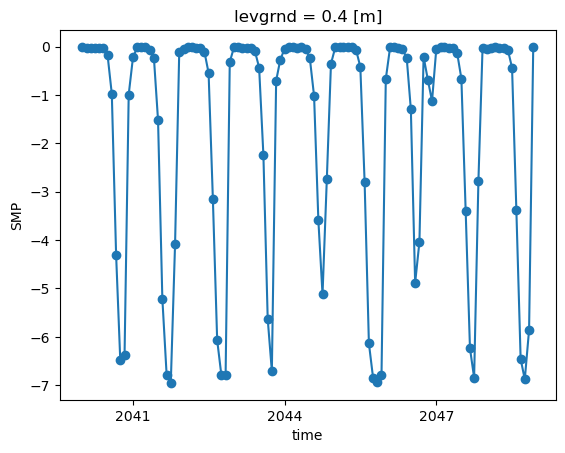

In [10]:
smp_at_half_meter_mpa = ds.SMP.isel(levgrnd = 5) / 1e5
smp_at_half_meter_mpa.plot(marker = "o")
plt.show()

In [ ]:
smp_at_half_meter_mpa.groupby(ds.time.dt.month).mean().plot()

### Light

#### Direct PAR profile for timestep x

In [ ]:
ds.FATES_PARPROF_DIR_CLLL.sel(time="1910-07-01").plot(marker = "o")

#### Diffuse PAR profile for timestep x

In [ ]:
ds.FATES_PARPROF_DIF_CLLL.sel(time="1910-07-01").plot(marker = "o")

#### Shrub PAR absorbtion per unit of LAI

In [ ]:
shrubLAI_shade = ds.FATES_LAISHA_Z_CLLLPF.sel(fates_levcnlfpf = slice(180,240)).sum(axis = 1)
shrubPARZ_shade = ds.FATES_PARSHA_Z_CLLLPF.sel(fates_levcnlfpf = slice(180,240)).sum(axis = 1)
shrubPARZ_shade_per_m2_leaf_area = shrubPARZ_shade / shrubLAI_shade

shrubLAI_sun = ds.FATES_LAISUN_Z_CLLLPF.sel(fates_levcnlfpf = slice(180,240)).sum(axis = 1)
shrubPARZ_sun = ds.FATES_PARSUN_Z_CLLLPF.sel(fates_levcnlfpf = slice(180,240)).sum(axis = 1)
shrubPARZ_sun_per_m2_leaf_area = shrubPARZ_sun / shrubLAI_sun

shrubPARZ_per_m2_leaf_area = shrubPARZ_shade_per_m2_leaf_area + shrubPARZ_sun_per_m2_leaf_area

shrubPARZ_per_m2_leaf_area.plot(marker = "o")

plt.ylabel("PAR absorbed by shrubs [W m-2 leaf area]")

#### PAR absorbed

In [ ]:
ds.FATES_PARSUN_Z_CLLLPF.isel(time = 25*6).plot()

In [ ]:
shrubLAI_shade = ds.FATES_LAISHA_Z_CLLLPF.sel(fates_levcnlfpf = slice(180,240)).sum(axis = 1)
shrubPARZ_shade = ds.FATES_PARSHA_Z_CLLLPF.sel(fates_levcnlfpf = slice(180,240)).sum(axis = 1)
shrubPARZ_shade_per_m2_leaf_area = shrubPARZ_shade / shrubLAI_shade

shrubLAI_sun = ds.FATES_LAISUN_Z_CLLLPF.sel(fates_levcnlfpf = slice(180,240)).sum(axis = 1)
shrubPARZ_sun = ds.FATES_PARSUN_Z_CLLLPF.sel(fates_levcnlfpf = slice(180,240)).sum(axis = 1)
shrubPARZ_sun_per_m2_leaf_area = shrubPARZ_sun / shrubLAI_sun

shrubPARZ_per_m2_leaf_area = shrubPARZ_shade_per_m2_leaf_area + shrubPARZ_sun_per_m2_leaf_area

shrubPARZ_per_m2_leaf_area.plot(marker = "o")

plt.ylabel("PAR absorbed by shrubs [W m-2 leaf area]")

#### Total PAR absorbed by shrubs

In [ ]:
PAR_Z_total = shrubPARZ_shade + shrubPARZ_sun
PAR_Z_total.plot()
plt.ylabel("Shrub PAR absorbed [W m-2]")

In [ ]:
# def clllpf_to_cl_ll_pf(clllpf_var, dataset):
#     n_cl = 2
#     cl_llpf = (clllpf_var.rolling(fates_levcnlfpf = n_cl, center=False).construct("fates_levcl")
#         .isel(fates_levcnlfpf=slice(n_cl-1, None, n_cl))
#         .rename({'fates_levcnlfpf':'fates_levllpf'})
#         .assign_coords({'fates_levcl':np.array([1,2])})
#         .assign_coords({'fates_levllpf':np.arange(0,120)}))
    
#     cl_ll_pf = (cl_llpf.rolling(fates_levllpf = n_pfts, center=False).construct("fates_levpft")
#                 .isel(fates_levllpf=slice(n_pfts-1, None, n_pfts))
#                 .rename({"fates_levllpf":"fates_levll"})
#                 .assign_coords({"fates_levll":np.arange(0,30)})
#                 .assign_coords({"fates_levpft":dataset.fates_levpft}))
    
#     return cl_ll_pf